<a href="https://colab.research.google.com/github/tasteapple/Data/blob/main/%EA%B8%B0%EB%A7%90%EB%8C%80%EC%B2%B4%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

비행기 가격이 어떤것에 영향을 받는지를 알아보자

In [232]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
df = pd.read_csv('Clean_Dataset.csv', encoding='utf-8')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [234]:
#unnamed는 필요가 없다고 판단이 됨 따라서 삭제
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


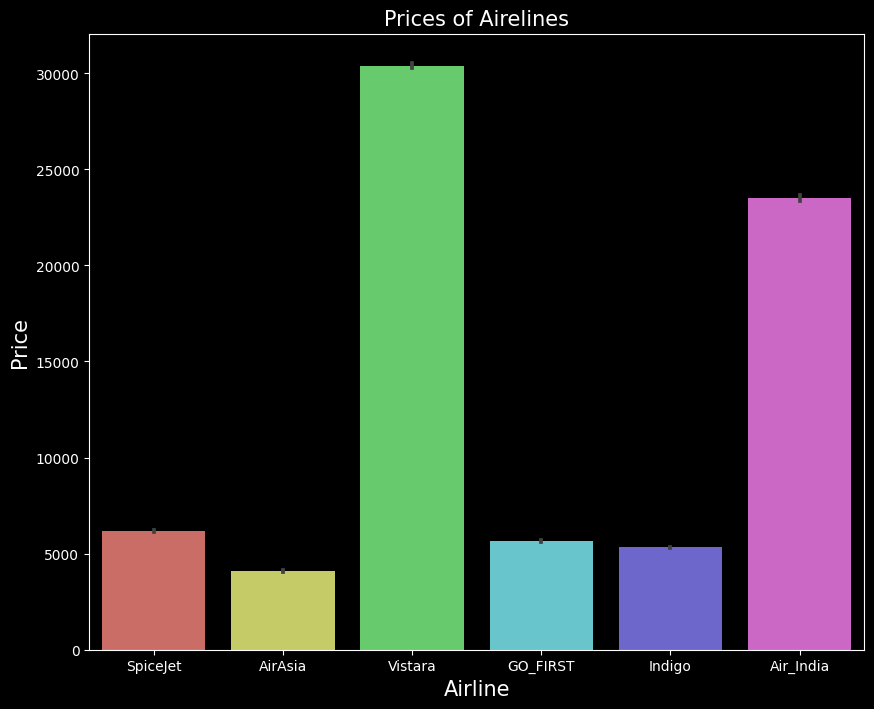

In [235]:
#항공사 별로 가격이 가격이 다른가?
plt.figure(figsize=(10,8))
sns.barplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Prices of Airelines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

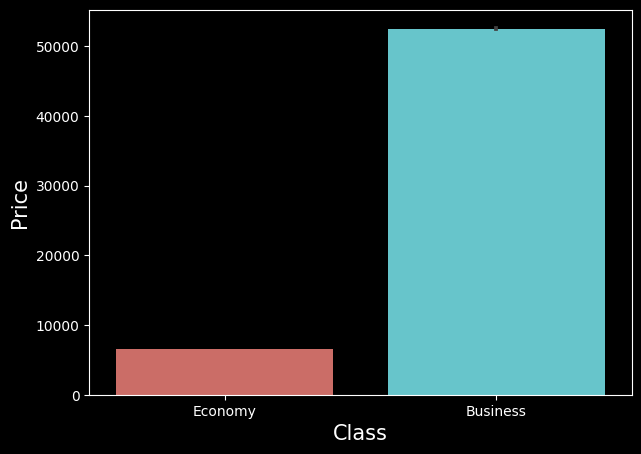

In [236]:
# 비지니스서과 이코노미석의 가격차이
plt.figure(figsize=(7,5))
sns.barplot(x=df['class'],y=df['price'],palette='hls')
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

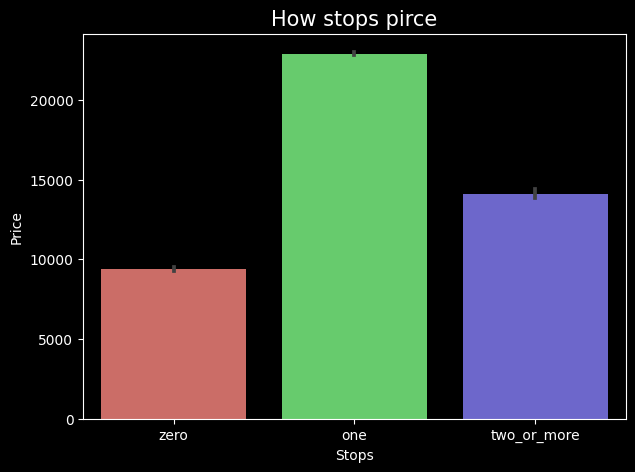

In [237]:
# 비행기 정차(경우지)횟수에 따른 가격의 차이
plt.figure(figsize=(7,5))
sns.barplot(x=df['stops'],y=df['price'],palette='hls')
plt.title('How stops pirce',fontsize=15)
plt.xlabel('Stops',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.show()

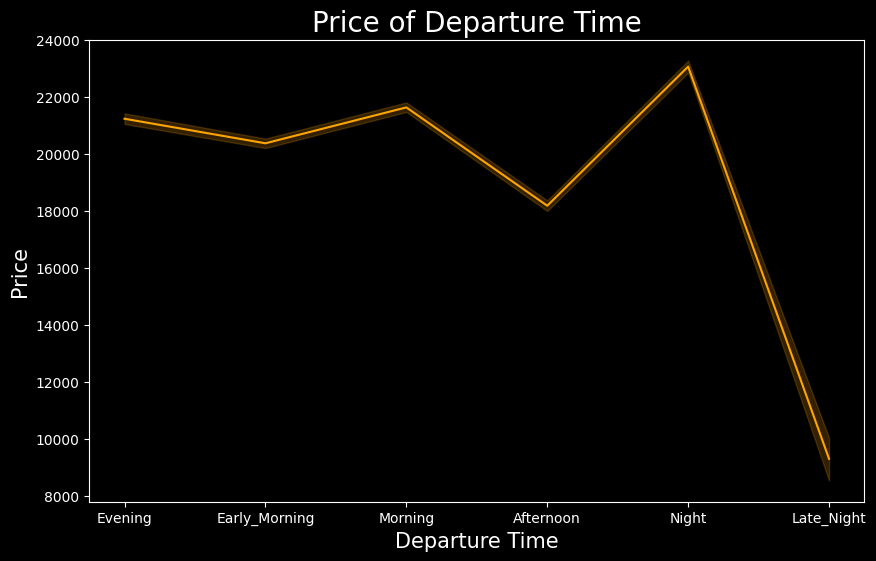

In [238]:
# 출발시간에 따른 가격
plt.figure(figsize=(10,6))
sns.lineplot(x=df['departure_time'],y=df['price'], color='orange')
plt.title('Price of Departure Time',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
# 심야 비행기가 가장 저렴하고 저녁 비행기가 가장비싸다

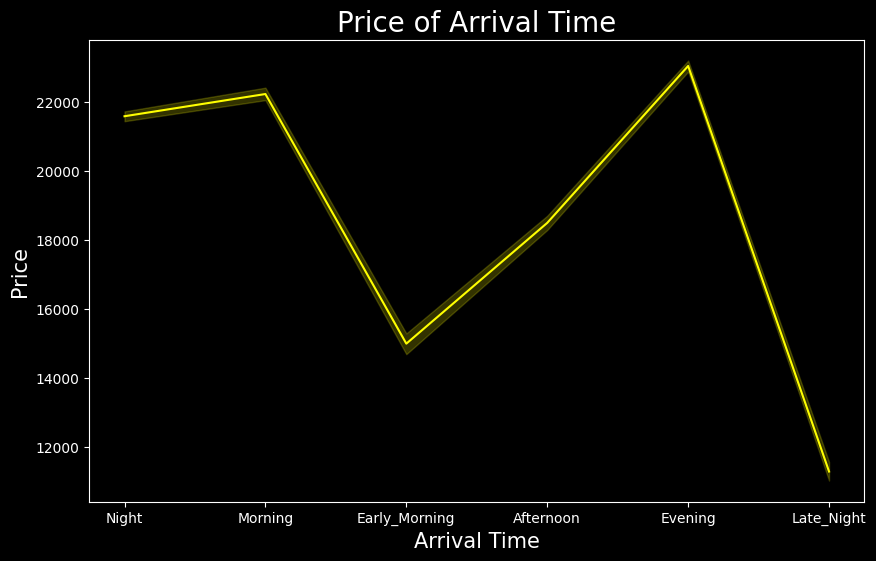

In [239]:
# 도착시간에 따른 가격
plt.figure(figsize=(10,6))
sns.lineplot(x=df['arrival_time'],y=df['price'], color='yellow')
plt.title('Price of Arrival Time',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
# 심야도착이 가장 싸고 저녁 도착이 가장 비싸다

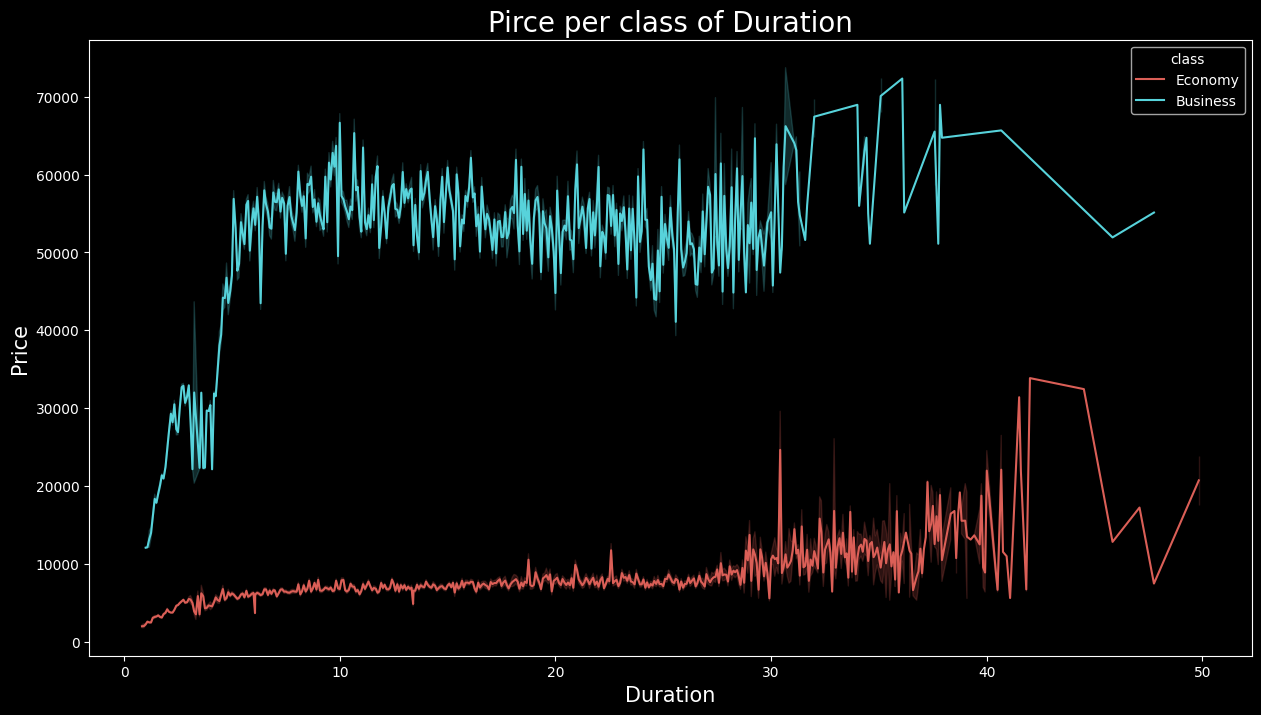

In [240]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df['duration'],y=df['price'],hue=df['class'],palette='hls')
plt.title('Pirce per class of Duration',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

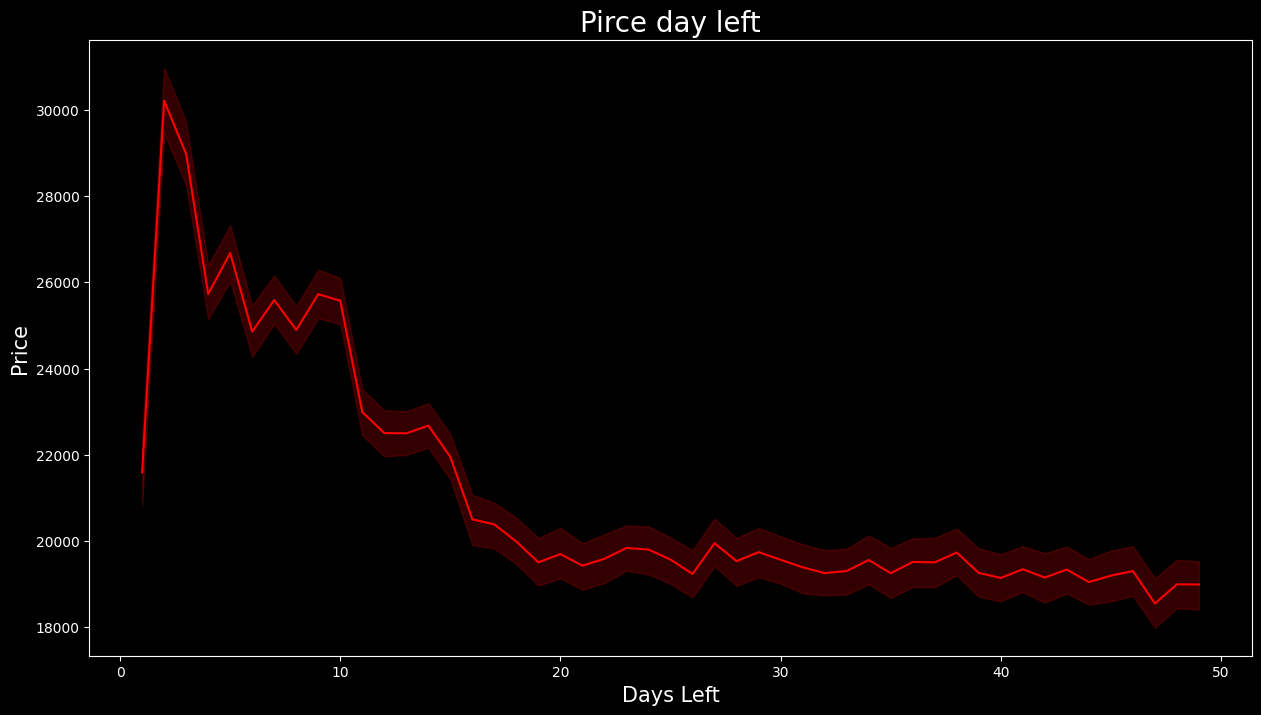

In [241]:
# 출발일 까지 남은 시간이 가격에 영향을 미칠까?
plt.figure(figsize=(15,8))
sns.lineplot(x=df['days_left'],y=df['price'],color='red')
plt.title('Pirce day left',fontsize=20)
plt.xlabel('Days Left',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()
# 출발일이 가까워 질수록 비싸지다가 1일전에 갑자기 싸진다